# Sew Images to create experimental images


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import string
import os

In [2]:
## read in data info
bbx_list = pd.read_csv(f'./psychophysics_experiment/cocop_bbx_fixations_new.csv')
bbx_list

,image_name,object_name,index,bbx_x_16,bbx_y_16,bbx_w_16,bbx_h_16,imsize_x_16,imsize_y_16,imsize_x_22,...,fx_x_22_10,fx_y_22_10,fx_x_16_15,fx_y_16_15,fx_x_22_15,fx_y_22_15,fx_x_16_20,fx_y_16_20,fx_x_22_20,fx_y_22_20
0,000000001268.jpg,cell phone,8,529,181,30,19,640,427,880,...,528.113098,284.102586,305.255230,214.513972,418.669648,295.153879,225.673640,222.685296,309.226197,306.205172
1,000000009769.jpg,fire hydrant,2,552,259,12,21,640,480,880,...,548.627708,343.287793,319.762057,239.971007,439.441562,329.931690,240.349409,230.294676,330.255416,316.575586
2,000000011197.jpg,bicycle,1,554,162,48,29,640,427,880,...,577.150169,273.683075,340.430573,210.070034,468.225253,289.024612,261.240764,221.426712,359.300338,304.366150
3,000000013546.jpg,skateboard,3,510,209,40,50,640,425,880,...,509.106920,298.958683,291.306264,208.993990,399.660380,287.938024,211.741686,200.658653,290.213841,276.917366
4,000000016439.jpg,wine glass,2,412,262,43,91,640,480,880,...,405.815214,309.709676,226.559714,184.597352,311.222822,253.564514,157.746285,143.796470,216.630429,197.419351
5,000000018150.jpg,bottle,1,275,230,34,57,640,480,880,...,586.213411,236.273455,493.882834,128.218178,678.820116,176.910182,561.177112,84.957571,771.426821,117.546910
6,000000018380.jpg,vase,40,514,88,11,30,640,426,880,...,521.619199,247.722196,308.953792,219.105944,425.428798,301.083295,238.938389,257.807926,329.238397,354.444393
7,000000019042.jpg,bird,1,308,165,21,40,640,371,880,...,634.773982,352.386991,558.000000,185.000000,733.160973,401.580487,638.000000,185.000000,831.547964,450.773982
8,000000061268.jpg,person,2,54,276,25,57,640,424,880,...,297.546413,343.246588,291.653996,222.267057,400.819619,305.369882,366.871995,195.022742,504.092825,267.493176
9,000000063602.jpg,cup,2,415,228,37,68,640,425,880,...,394.802226,272.008677,213.525339,164.887318,294.203339,227.513015,140.367118,132.516424,193.604451,183.017353


In [3]:
with open('./psychophysics_experiment/final_stim_list.txt') as f:
    lines = f.readlines()
stim_list = [l.strip('.jpg\n') for l in lines]

In [4]:
def readin_eccs(imname,seed=0,present=True):
    if present:
        directory = './psychophysics_experiment/stimuli/uniform/present'
        inpaint_string = ''
        ext='jpg'
    else:
        directory = './psychophysics_experiment/stimuli/uniform/absent'
        #inpaint_string = '_inpaint'
        inpaint_string = ''
        ext='png'
    imnum = imname.replace('.jpg','')
    im_fov = cv2.imread(f'{directory}/ecc0/{imnum}.{ext}')
    im_fov = cv2.cvtColor(im_fov, cv2.COLOR_BGR2RGB)
    
    #ecc 80 image
    try:
        im_80 = cv2.imread(f'{directory}/ecc80/mongrel_{imnum}{inpaint_string}_ecc_80_{seed}.jpg')
        im_80 = cv2.cvtColor(im_80, cv2.COLOR_BGR2RGB)
    except:
        im_80 = np.zeros_like(im_fov)
    #ecc 160 image
    try:
        im_160 = cv2.imread(f'{directory}/ecc160/mongrel_{imnum}{inpaint_string}_ecc_160_{seed}.jpg')
        im_160 = cv2.cvtColor(im_160, cv2.COLOR_BGR2RGB) 
    except:
        im_160 = np.zeros_like(im_fov)
    #ecc 240 image
    try:
        im_240 = cv2.imread(f'{directory}/ecc240/mongrel_{imnum}{inpaint_string}_ecc_240_{seed}.jpg')
        im_240 = cv2.cvtColor(im_240, cv2.COLOR_BGR2RGB)
    except:
        im_240 = np.zeros_like(im_fov)
    #ecc 320 image
    try:
        im_320 = cv2.imread(f'{directory}/ecc320/mongrel_{imnum}{inpaint_string}_ecc_320_{seed}.jpg')
        im_320 = cv2.cvtColor(im_320, cv2.COLOR_BGR2RGB)
    except:
        im_320 = np.zeros_like(im_fov)
    # #ecc 400 image
    try:
        im_400 = cv2.imread(f'{directory}/ecc400/mongrel_{imnum}{inpaint_string}_ecc_400_{seed}.jpg')
        im_400 = cv2.cvtColor(im_400, cv2.COLOR_BGR2RGB)
    except:
        im_400 = np.zeros_like(im_fov)
    # return
    # return(im_fov,im_80,im_160,im_240,im_320,im_400)
    return(im_fov,im_80,im_160,im_240,im_320)

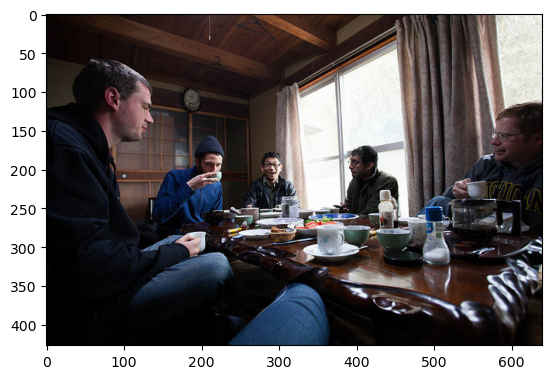

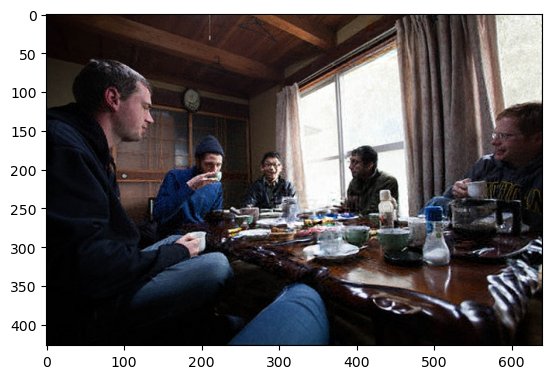

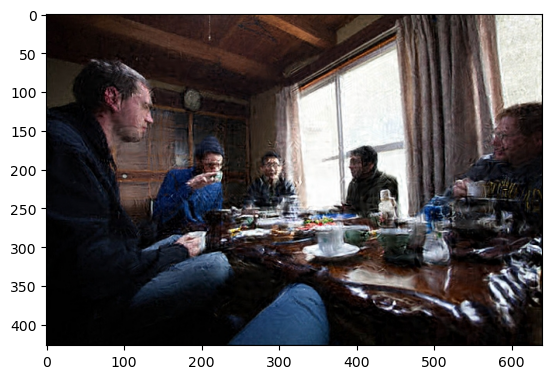

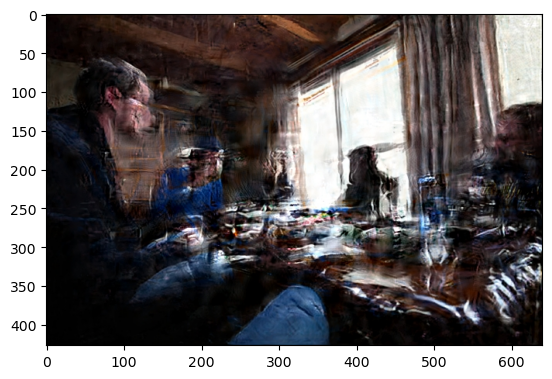

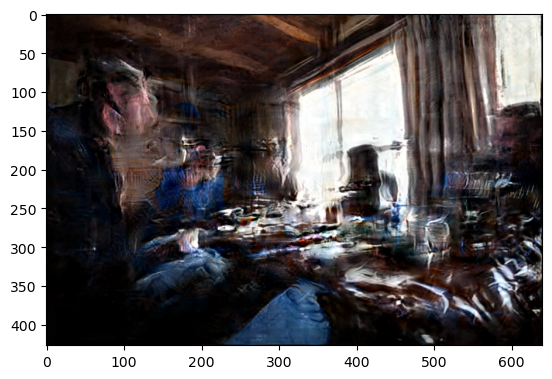

In [5]:
#test in reading an image
unif_mong_list = readin_eccs('000000009590.jpg',0)
for i in range(len(unif_mong_list)):
    plt.imshow(unif_mong_list[i])
    plt.show()


## Target Present

In [ ]:
#import time
#calcuate in native 16ppd
fovea_size = ppd = 16

save_folder = './psychophysics_experiment/stimuli/pseudofoveated/present/'

os.makedirs("./psychophysics_experiment/stimuli/pseudofoveated/present/80",exist_ok=True)
os.makedirs("./psychophysics_experiment/stimuli/pseudofoveated/present/160",exist_ok=True)
os.makedirs("./psychophysics_experiment/stimuli/pseudofoveated/present/240",exist_ok=True)
os.makedirs("./psychophysics_experiment/stimuli/pseudofoveated/present/320",exist_ok=True)


obj_eccs = [80,160,240,320]
for imname in bbx_list['image_name']:
    imnum = imname.replace('.jpg','')
    if imnum in stim_list:
        for seed in range(10):
            #readin eccentricity mongrels
        #    im_fov,im_80,im_160,im_240,im_320 = readin_eccs(imname)
            unif_mong_list = readin_eccs(imname,seed)
            #calculate pixel radius
            img_shape = np.shape(unif_mong_list[0])
            y, x = np.indices([img_shape[0], img_shape[1]])
            num_bins = np.min([img_shape[0], img_shape[1]])
            #loop through fixation eccentricities
            for fx_ecc in obj_eccs[:]:
                #get fixation location
                deg_ecc = fx_ecc//ppd
                fx_x = bbx_list.loc[bbx_list['image_name'] == imname, f'fx_x_{ppd}_{deg_ecc}'].item()
                fx_y = bbx_list.loc[bbx_list['image_name'] == imname, f'fx_y_{ppd}_{deg_ecc}'].item()
                #calcualte radius from fixation location
                normalized = ((x-fx_x),(y-fx_y))
                r = np.hypot(normalized[0], normalized[1])
                #loop through image eccentricity rings
                ecc_offset = 40 #halfway in between each eccentricity
                ecc_ranges = [[0,fovea_size], #fovea
                              [fovea_size,obj_eccs[0]+ecc_offset], #80
                              [obj_eccs[1]-ecc_offset,obj_eccs[1]+ecc_offset], #160
                              [obj_eccs[2]-ecc_offset,obj_eccs[2]+ecc_offset], #240
                              [obj_eccs[3]-ecc_offset,obj_eccs[3]+ecc_offset],] #320
                              # [obj_eccs[4]-ecc_offset,obj_eccs[4]+ecc_offset]] #400
                #fill image rings in
                blend_radius = 5 #blend for 5 pixels above and below 
                # foveated_mong = np.zeros_like((unif_mong_list[0]))
                # changed to use the last mongrel as a base to get rid of black ring
                foveated_mong = unif_mong_list[-1]
                #start = time.time()
                for i, ecc_range in enumerate(ecc_ranges):
                    #non-lienar-blended mask
                    #ecc_mask = np.where((r>=ecc_range[0]) & (r<ecc_range[1]),1., 0.).astype(np.float32)
                    #last eccentricity goes only up to edge, no blending
                    #if(i==len(ecc_ranges)-1):
                    #ecc_mask = np.where((r>=ecc_range[0]) & (r<ecc_range[1]),1., 0.).astype(np.float32)
                    #else:
                    ecc_mask = np.where((r>=ecc_range[0]) & (r<ecc_range[1]+blend_radius),1., 0.).astype(np.float32)
                    #plt.imshow(ecc_mask)
                    #plt.colorbar()
                    #plt.show()
                    #linear blend below
                    if(i>0):
                        start_blend_r = ecc_range[0]-blend_radius
                        end_blend_r = ecc_range[0]+blend_radius
                        #mask must extend lower for linear blend
                        ecc_mask = np.where((r>=start_blend_r) & (r<ecc_range[1]+blend_radius),1.,0.).astype(np.float32)
                        ecc_mask = np.where((r>=start_blend_r) & (r<end_blend_r),(r-start_blend_r)/(end_blend_r-start_blend_r),ecc_mask)

                    #ecc_mask = np.where((r>=ecc_range[0])(r<ecc_range[1]),True, False) == True
                    ecc_mask_3d = np.concatenate((ecc_mask[:,:,None],ecc_mask[:,:,None],ecc_mask[:,:,None]),2)

                    invert_mask = 1.0-ecc_mask_3d

                    foveated_mong = np.uint8(ecc_mask_3d * unif_mong_list[i] + invert_mask * foveated_mong)
                    
                #end = time.time()
                #print(f'time: {end - start}')
                foveated_mong_cv2 = cv2.cvtColor(foveated_mong, cv2.COLOR_RGB2BGR)
                # plt.imshow(foveated_mong_cv2)
                # plt.show()
                cv2.imwrite(f'{save_folder}/{fx_ecc}/{imnum}_{seed}.png',foveated_mong_cv2)



## Target Absent

In [ ]:
#calcuate in native 16ppd
import os
fovea_size = ppd = 16
save_folder = './psychophysics_experiment/stimuli/pseudofoveated/absent/'

os.makedirs("./psychophysics_experiment/stimuli/pseudofoveated/absent/80",exist_ok=True)
os.makedirs("./psychophysics_experiment/stimuli/pseudofoveated/absent/160",exist_ok=True)
os.makedirs("./psychophysics_experiment/stimuli/pseudofoveated/absent/240",exist_ok=True)
os.makedirs("./psychophysics_experiment/stimuli/pseudofoveated/absent/320",exist_ok=True)
obj_eccs = [80,160,240,320]

for imname in bbx_list['image_name']:
    imnum = imname.replace('.jpg','')
    if imnum in stim_list:
        for seed in range(10):
            #readin eccentricity mongrels
        #    im_fov,im_80,im_160,im_240,im_320 = readin_eccs(imname)
            unif_mong_list = readin_eccs(imname,seed=seed,present=False)
            #calculate pixel radius
            img_shape = np.shape(unif_mong_list[0])
            y, x = np.indices([img_shape[0], img_shape[1]])
            num_bins = np.min([img_shape[0], img_shape[1]])
            #loop through fixation eccentricities
            for fx_ecc in obj_eccs[:]:
                #get fixation location
                deg_ecc = fx_ecc//ppd
                fx_x = bbx_list.loc[bbx_list['image_name'] == imname, f'fx_x_{ppd}_{deg_ecc}'].item()
                fx_y = bbx_list.loc[bbx_list['image_name'] == imname, f'fx_y_{ppd}_{deg_ecc}'].item()
                #calcualte radius from fixation location
                normalized = ((x-fx_x),(y-fx_y))
                r = np.hypot(normalized[0], normalized[1])
                #loop through image eccentricity rings
                ecc_offset = 40 #halfway in between each eccentricity
                ecc_ranges = [[0,fovea_size], #fovea
                              [fovea_size,obj_eccs[0]+ecc_offset], #80
                              [obj_eccs[1]-ecc_offset,obj_eccs[1]+ecc_offset], #160
                              [obj_eccs[2]-ecc_offset,obj_eccs[2]+ecc_offset], #240
                              [obj_eccs[3]-ecc_offset,obj_eccs[3]+ecc_offset],] #320
                              # [obj_eccs[4]-ecc_offset,obj_eccs[4]+ecc_offset]] #320
                #fill image rings in
                blend_radius = 5 #blend for 5 pixels above and below 
                # foveated_mong = np.zeros_like((unif_mong_list[0]))
                # changed to use the last mongrel as a base to get rid of black ring
                foveated_mong = unif_mong_list[-1]
                for i, ecc_range in enumerate(ecc_ranges):
                    #non-lienar-blended mask
                    #ecc_mask = np.where((r>=ecc_range[0]) & (r<ecc_range[1]),1., 0.).astype(np.float32)
                    #last eccentricity goes only up to edge, no blending
                    #if(i==len(ecc_ranges)-1):
                    #ecc_mask = np.where((r>=ecc_range[0]) & (r<ecc_range[1]),1., 0.).astype(np.float32)
                    #else:
                    ecc_mask = np.where((r>=ecc_range[0]) & (r<ecc_range[1]+blend_radius),1., 0.).astype(np.float32)
                    #plt.imshow(ecc_mask)
                    #plt.colorbar()
                    #plt.show()
                    #linear blend below
                    if(i>0):
                        start_blend_r = ecc_range[0]-blend_radius
                        end_blend_r = ecc_range[0]+blend_radius
                        #mask must extend lower for linear blend
                        ecc_mask = np.where((r>=start_blend_r) & (r<ecc_range[1]+blend_radius),1.,0.).astype(np.float32)
                        ecc_mask = np.where((r>=start_blend_r) & (r<end_blend_r),(r-start_blend_r)/(end_blend_r-start_blend_r),ecc_mask)

                    #ecc_mask = np.where((r>=ecc_range[0])(r<ecc_range[1]),True, False) == True
                    ecc_mask_3d = np.concatenate((ecc_mask[:,:,None],ecc_mask[:,:,None],ecc_mask[:,:,None]),2)

                    invert_mask = 1.0-ecc_mask_3d

                    #plt.imshow(ecc_mask_3d[:,:,0])
                    #plt.colorbar()
                    #plt.show()
                    #plt.imshow(invert_mask[:,:,0])
                    #plt.colorbar()
                    #plt.show()
                    foveated_mong = np.uint8(ecc_mask_3d * unif_mong_list[i] + invert_mask * foveated_mong)
                    #foveated_mong = np.where(ecc_mask_3d, unif_mong_list[i],foveated_mong)
                    #foveatd_mong = cv2.bitwise_and(foveated_mong,unif_mong_list[i],ecc_mask)

                    #foveated_mong[ecc_mask] = unif_mong_list[i][ecc_mask]
                #blend at edges
                #for i, ecc_range in ecc_ranges:
                    #blend_mask = np.where((r>ecc_range[1]-blend_radius) & (ecc_range[1]+blend_radius),r/,0.)
                    #blend_mask_3d = np.concatenate((blend_mask[:,:,None],blend_mask[:,:,None],blend_mask[:,:,None]),2)*255

                    #plt.imshow(r)
                    #plt.show()
                # plt.imshow(foveated_mong)
                # plt.scatter(fx_x,fx_y)
                # plt.title(imname)
                # plt.show()

                foveated_mong_cv2 = cv2.cvtColor(foveated_mong, cv2.COLOR_RGB2BGR) 
                cv2.imwrite(f'{save_folder}/{fx_ecc}/{imnum}_{seed}.png',foveated_mong_cv2)



In [ ]:
#example mask
plt.imshow(1.0-ecc_mask)
plt.show()
plt.imshow(ecc_mask)
plt.show()